In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
raw_path = "C:\\Users\\janwe\\OneDrive\\Dokumente\\Projekte\\Star_Wars_Legion_Rabbit\\01_data\\01_raw"
preprocessed_path = "C:\\Users\\janwe\\OneDrive\Dokumente\\Projekte\\Star_Wars_Legion_Rabbit\\01_data\\02_processed"

excel_pd = pd.read_excel(raw_path+"\Liga.xlsx",index_col=0,sheet_name='Spiele')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
excel_pd['Gewinner_Fraktion'] = np.select(
    [
        excel_pd['Spieler_1'] == excel_pd['Gewinner'], 
        excel_pd['Spieler_2'] == excel_pd['Gewinner']
    ], 
    [
        excel_pd['Fraktion_Spieler_1'], 
        excel_pd['Fraktion_Spieler_2']
    ], 
    default=None
)

In [3]:
excel_pd['Looser_Fraktion'] = np.select(
    [
        excel_pd['Spieler_1'] == excel_pd['Gewinner'], 
        excel_pd['Spieler_2'] == excel_pd['Gewinner']
    ], 
    [
        excel_pd['Fraktion_Spieler_2'], 
        excel_pd['Fraktion_Spieler_1']
    ], 
    default=None
)

In [4]:
excel_pd.head()

,Spieltag,Spieler_1,Fraktion_Spieler_1,Spieler_2,Fraktion_Spieler_2,Gewinner,Gewinner_Fraktion,Looser_Fraktion
Planet,,,,,,,,
Hoth,Spieltag 1,Jan W.,Rebellen,Kevin,Imperium,Kevin,Imperium,Rebellen
Hoth,Spieltag 1,Krauti,Seperatisten,Matu,Klone,Krauti,Seperatisten,Klone
Hoth,Spieltag 1,Mustafa,Klone,Robin,Imperium,Robin,Imperium,Klone
Hoth,Spieltag 2,Robin,NaN,Krauti,NaN,NaN,None,None
Hoth,Spieltag 2,Mustafa,Klone,Jan W.,Rebellen,Mustafa,Klone,Rebellen


In [5]:
factions_winner = excel_pd['Gewinner_Fraktion'].unique()
factions_looser = excel_pd['Looser_Fraktion'].unique()

In [13]:
unique_factions = np.concatenate([factions_winner,factions_looser])

In [20]:
unique_factions = unique_factions[unique_factions != np.array(None)]

In [22]:
unique_factions = np.unique(unique_factions)

In [65]:
unique_factions = np.sort(unique_factions)

In [66]:
unique_factions 

array(['Imperium', 'Klone', 'Rebellen', 'Schattenkollektiv',
       'Seperatisten'], dtype=object)

In [59]:
idx = unique_factions
cols = unique_factions

In [70]:
array = []
for win_faction in unique_factions:
    row = []
    for looser_faction  in unique_factions:
        val = sum(np.select(
            [
                (excel_pd['Gewinner_Fraktion'] ==win_faction) &
                (excel_pd['Looser_Fraktion'] == looser_faction)
            ], 
            [
                1
            ], 
                default=0
        ))
        row.append(val)
    array.append(row)

current win_faction: Imperium
current losser_faction: Imperium
current win_faction: Imperium
current losser_faction: Klone
current win_faction: Imperium
current losser_faction: Rebellen
current win_faction: Imperium
current losser_faction: Schattenkollektiv
current win_faction: Imperium
current losser_faction: Seperatisten
current win_faction: Klone
current losser_faction: Imperium
current win_faction: Klone
current losser_faction: Klone
current win_faction: Klone
current losser_faction: Rebellen
current win_faction: Klone
current losser_faction: Schattenkollektiv
current win_faction: Klone
current losser_faction: Seperatisten
current win_faction: Rebellen
current losser_faction: Imperium
current win_faction: Rebellen
current losser_faction: Klone
current win_faction: Rebellen
current losser_faction: Rebellen
current win_faction: Rebellen
current losser_faction: Schattenkollektiv
current win_faction: Rebellen
current losser_faction: Seperatisten
current win_faction: Schattenkollektiv
c

In [72]:
df = pd.DataFrame(array,
                   columns = cols, index = idx)

In [73]:
df

,Imperium,Klone,Rebellen,Schattenkollektiv,Seperatisten
Imperium,0,2,2,1,1
Klone,0,0,1,0,0
Rebellen,0,0,0,1,0
Schattenkollektiv,0,1,0,0,1
Seperatisten,0,1,1,0,0


<AxesSubplot:>

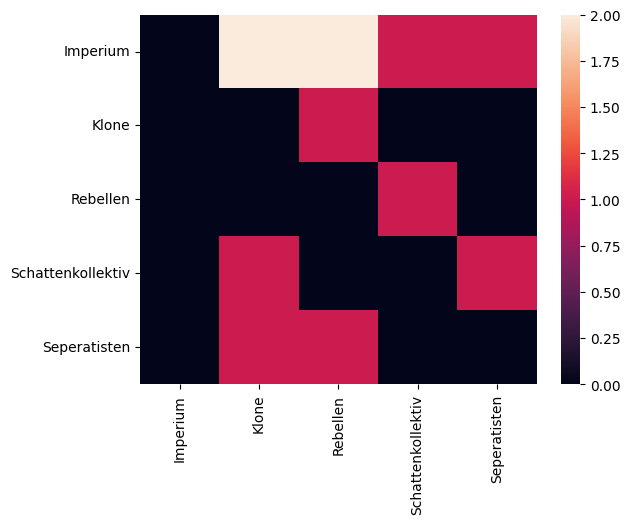

In [75]:
sns.heatmap(df)